In [1]:
import xarray as xr
from cmip6_preprocessing.preprocessing import combined_preprocessing
# import PyCO2SYS as pyco2
import intake
import matplotlib.pyplot as plt
import numpy as np
import warnings
import gsw
warnings.filterwarnings("ignore")

In [2]:
col = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")

In [3]:
var_id = 'dissic'
var_id_2 = 'thetao'
var_id_3 = 'so'
exp_id = 'piControl'
print(var_id, exp_id)

dissic piControl


In [4]:
cat_DIC = col.search(variable_id= 'dissic', experiment_id= exp_id)
cat_DIC.df['source_id'].unique()

array(['GFDL-ESM4', 'GFDL-CM4', 'CNRM-ESM2-1', 'IPSL-CM6A-LR', 'CESM2',
       'CESM2-WACCM', 'CanESM5-CanOE', 'CanESM5', 'MPI-ESM-1-2-HAM',
       'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 'GISS-E2-1-G-CC', 'GISS-E2-1-G',
       'MIROC-ES2L', 'NorESM1-F', 'CESM2-WACCM-FV2', 'CESM2-FV2',
       'ACCESS-ESM1-5', 'UKESM1-0-LL', 'MRI-ESM2-0', 'KIOST-ESM',
       'NorESM2-LM', 'CMCC-ESM2', 'IPSL-CM5A2-INCA'], dtype=object)

cat_thetao = col.search(variable_id= 'thetao', experiment_id= exp_id)
cat_thetao.df['source_id'].unique()

In [5]:
# exclude two models that dont work quite right
#source_ids = [m for m in cat_DIC.df['source_id'].unique() if m not in ['CMCC-ESM2', 'KIOST-ESM']]
source_ids = ['CanESM5-CanOE', 'CanESM5', 'ACCESS-ESM1-5',
                        'MPI-ESM-1-2-HAM', 'IPSL-CM6A-LR', 'MIROC-ES2L',
                        'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'NorCPM1',
                        'NorESM1-F', 'NorESM2-LM', 'NorESM2-MM', 'GFDL-ESM4']
DICdict = cat_DIC.search(source_id=source_ids).to_dataset_dict(
    zarr_kwargs={'consolidated': True, 'use_cftime':True},
    storage_options={'token': 'anon'},
    preprocess=combined_preprocessing,
    aggregate=False)
DICdict


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'
MIROC-ES2L: No units found


MIROC-ES2L: No units found


{'CMIP.MIROC.MIROC-ES2L.piControl.r1i1p1f2.Omon.dissic.gr1.gs://cmip6/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Omon/dissic/gr1/v20200731/.nan.20200731': <xarray.Dataset>
 Dimensions:      (bnds: 2, lev: 63, time: 6000, x: 360, y: 180)
 Coordinates:
   * y            (y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
     lat_bnds     (y, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
   * lev          (lev) float64 1.0 3.5 7.0 11.0 ... 6.24e+03 6.87e+03 7.25e+03
     lev_bounds   (lev, bnds) float64 dask.array<chunksize=(63, 2), meta=np.ndarray>
   * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
     lon_bnds     (x, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
     sigma_bnds   (lev, bnds) float64 dask.array<chunksize=(63, 2), meta=np.ndarray>
   * time         (time) object 1850-01-16 12:00:00 ... 2349-12-16 12:00:00
     time_bounds  (time, bnds) object dask.array<chunksize=(6000, 2), meta=np.ndarray>
     zle

In [ ]:
thetao_dict = cat_thetao.search(source_id=source_ids).to_dataset_dict(
    zarr_kwargs={'consolidated': True, 'use_cftime':True},
    storage_options={'token': 'anon'},
    preprocess=combined_preprocessing,
    aggregate=False)

In [6]:
def meridionalsection(ax,da,clims=None,title=None):
    im = ax.pcolormesh(da['y'],da['lev'],da)
    if clims is not None:
        im.set_clim(clims)
    ax.set_xlim([-80,60])
    ax.invert_yaxis()
    plt.colorbar(im,ax=ax)
    ax.set_title(title)
    ax.contour(da['y'],da['lev'],DIC,levels=[36,36.4,36.8],colors='w')
    
def meridionalsection_with_sigma2(ax,da,sigma2,clims=None,title=None):
    meridionalsection(ax,da,clims)
    ax.contour(da['y'],da['lev'],sigma2,levels=[36,36.4,36.8],colors='w')
    ax.set_title(title)

In [6]:
a = 'CMIP.NCC.NorESM2-LM.piControl.r1i1p1f1.Oyr.dissic.gr.gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/piControl/r1i1p1f1/Oyr/dissic/gr/v20210118/.nan.20210118'
b = 'CMIP.CCCma.CanESM5.piControl.r1i1p1f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p1f1/Omon/dissic/gn/v20190429/.nan.20190429'
c = 'CMIP.MPI-M.MPI-ESM1-2-LR.piControl.r1i1p1f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/piControl/r1i1p1f1/Omon/dissic/gn/v20190710/.nan.20190710'
e = 'CMIP.CCCma.CanESM5.piControl.r1i1p2f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p2f1/Omon/dissic/gn/v20190429/.nan.20190429'
f = 'CMIP.NOAA-GFDL.GFDL-ESM4.piControl.r1i1p1f1.Oyr.dissic.gr.gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/piControl/r1i1p1f1/Oyr/dissic/gr/v20180701/.nan.20180701'
g = 'CMIP.CSIRO.ACCESS-ESM1-5.piControl.r1i1p1f1.Oyr.dissic.gn.gs://cmip6/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/piControl/r1i1p1f1/Oyr/dissic/gn/v20191214/.nan.20191214'
h = 'CMIP.IPSL.IPSL-CM6A-LR.piControl.r1i1p1f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/piControl/r1i1p1f1/Omon/dissic/gn/v20200326/.nan.20200326'
k = 'CMIP.CCCma.CanESM5-CanOE.piControl.r1i1p2f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5-CanOE/piControl/r1i1p2f1/Omon/dissic/gn/v20190429/.nan.20190429'
l = 'CMIP.HAMMOZ-Consortium.MPI-ESM-1-2-HAM.piControl.r1i1p1f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/piControl/r1i1p1f1/Omon/dissic/gn/v20190627/.nan.20190627'
m = 'CMIP.MPI-M.MPI-ESM1-2-HR.piControl.r1i1p1f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/piControl/r1i1p1f1/Omon/dissic/gn/v20190710/.nan.20190710'
n = 'CMIP.CCCma.CanESM5.piControl.r1i1p1f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p1f1/Omon/dissic/gn/v20190429/.nan.20190429'
o = 'CMIP.IPSL.IPSL-CM6A-LR.piControl.r1i2p1f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/piControl/r1i2p1f1/Omon/dissic/gn/v20190319/.nan.20190319'
p = 'CMIP.NOAA-GFDL.GFDL-ESM4.piControl.r1i1p1f1.Omon.dissic.gr.gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/piControl/r1i1p1f1/Omon/dissic/gr/v20180701/.nan.20180701'
q = 'CMIP.NCC.NorESM1-F.piControl.r1i1p1f1.Oyr.dissic.gr.gs://cmip6/CMIP6/CMIP/NCC/NorESM1-F/piControl/r1i1p1f1/Oyr/dissic/gr/v20190920/.nan.20190920'
r = 'CMIP.CCCma.CanESM5-CanOE.piControl.r1i1p2f1.Oyr.dissic.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5-CanOE/piControl/r1i1p2f1/Oyr/dissic/gn/v20190429/.nan.20190429'
s = 'CMIP.MPI-M.MPI-ESM1-2-LR.piControl.r2i1p1f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/piControl/r2i1p1f1/Omon/dissic/gn/v20190815/.nan.20190815'
u = 'CMIP.MIROC.MIROC-ES2L.piControl.r1i1p1f2.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Omon/dissic/gn/v20190823/.nan.20190823'
v = 'CMIP.CSIRO.ACCESS-ESM1-5.piControl.r1i1p1f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/piControl/r1i1p1f1/Omon/dissic/gn/v20191214/.nan.20191214'
aa = 'CMIP.CCCma.CanESM5.piControl.r1i1p2f1.Oyr.dissic.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p2f1/Oyr/dissic/gn/v20190429/.nan.20190429'
bb = 'CMIP.NCC.NorESM2-LM.piControl.r1i1p1f1.Oyr.dissic.gr.gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/piControl/r1i1p1f1/Oyr/dissic/gr/v20210118/.nan.20210118'
cc = 'CMIP.NCC.NorESM2-LM.piControl.r1i1p1f1.Oyr.dissic.gn.gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/piControl/r1i1p1f1/Oyr/dissic/gn/v20210118/.nan.20210118'
ee = 'CMIP.NCC.NorESM2-LM.piControl.r1i1p1f1.Omon.dissic.gr.gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/piControl/r1i1p1f1/Omon/dissic/gr/v20210118/.nan.20210118'
ff = 'CMIP.NCC.NorESM1-F.piControl.r1i1p1f1.Omon.dissic.gn.gs://cmip6/CMIP6/CMIP/NCC/NorESM1-F/piControl/r1i1p1f1/Omon/dissic/gn/v20190920/.nan.20190920'
gg = 'CMIP.MIROC.MIROC-ES2L.piControl.r1i1p1f2.Omon.dissic.gr1.gs://cmip6/CMIP6/CMIP/MIROC/MIROC-ES2L/piControl/r1i1p1f2/Omon/dissic/gr1/v20200731/.nan.20200731'


In [7]:

DICa = DICdict[a].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICb = DICdict[b].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICc = DICdict[c].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICe = DICdict[e].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICf = DICdict[f].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICg = DICdict[g].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICh = DICdict[h].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICk = DICdict[k].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICl = DICdict[l].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICm = DICdict[m].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICn = DICdict[n].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICo = DICdict[o].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICp = DICdict[p].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICq = DICdict[q].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICr = DICdict[r].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICs = DICdict[s].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICu = DICdict[u].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
DICv = DICdict[v].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)


In [8]:
source_ids = ['CanESM5-CanOE', 'CanESM5', 'ACCESS-ESM1-5',
                        'MPI-ESM-1-2-HAM', 'IPSL-CM6A-LR', 'MIROC-ES2L',
                        'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'NorCPM1',
                        'NorESM1-F', 'NorESM2-LM', 'NorESM2-MM', 'GFDL-ESM4']
abc = 'CMIP.CCCma.CanESM5.piControl.r1i1p1f1.Omon.thetao.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p1f1/Omon/thetao/gn/v20190306/.nan.20190306'

Text(0.5, 1.0, 'CanESM5 thetao')

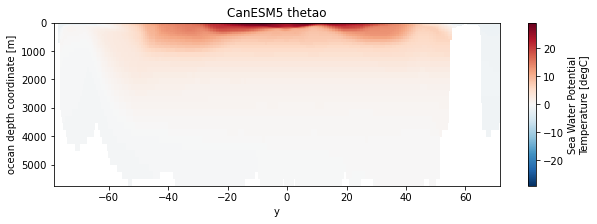

In [71]:
fig2, ax2 = plt.subplots(figsize=[10,3])
THETAO = thetao_dict[abc].isel(time=1200).sel(x=slice(180,200)).mean('x', keep_attrs=True)
THETAO.thetao.plot()
plt.gca().invert_yaxis()
ax2.set_title(THETAO.attrs['source_id'] + ' ' + THETAO.attrs['variable_id'])


In [27]:
dic = DIC['dissic']
DIC.dissic.head()

<xarray.DataArray 'dissic' (lev: 5, y: 5)>
dask.array<getitem, shape=(5, 5), dtype=float32, chunksize=(5, 5), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 -78.39 -78.19 -77.98 -77.77 -77.56
  * lev      (lev) float64 3.047 9.454 16.36 23.9 32.21
    time     object 5301-01-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Dissolved inorganic carbon (CO3+HCO3+H2CO3) concentration
    history:        mltby1em3
    long_name:      Dissolved Inorganic Carbon Concentration
    original_name:  DIC
    standard_name:  mole_concentration_of_dissolved_inorganic_carbon_in_sea_w...
    units:          mol m-3

Text(0.5, 1.0, 'IPSL-CM6A-LR h')

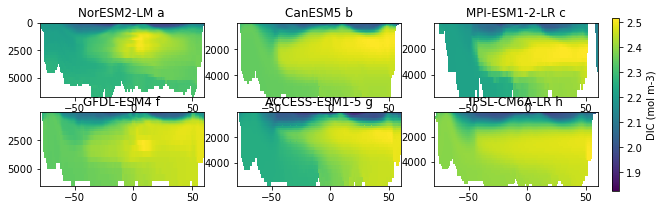

In [15]:
figa, ((axa, axb, axc), (axf, axg, axh)) = plt.subplots(nrows = 2,ncols = 3, figsize=[10,3])
ima = axa.pcolormesh(DICa['y'],DICa['lev'],DICa.dissic)
axa.set_xlim([-80,60])
axa.invert_yaxis()
cbaxes = figa.add_axes([0.92, 0.1, 0.01, 0.8]) 
cbara = figa.colorbar(ima, cax = cbaxes)
cbara.set_label('DIC ('+DICa.dissic.attrs['units']+')')
axa.set_title(DICa.attrs['source_id']+' a')

#figb, axb = plt.subplots(figsize=[10,3])
imb = axb.pcolormesh(DICb['y'],DICb['lev'],DICb.dissic)
axb.set_xlim([-80,60])
axb.invert_yaxis()
# cbarb = plt.colorbar(ima)
# cbarb.set_label('DIC ('+DICa.dissic.attrs['units']+')')
axb.set_title(DICb.attrs['source_id']+' b')

#figc, axc = plt.subplots(figsize=[10,3])
imc = axc.pcolormesh(DICc['y'],DICc['lev'],DICc.dissic)
axc.set_xlim([-80,60])
axc.invert_yaxis()
# cbarc = plt.colorbar(ima)
# cbarc.set_label('DIC ('+DICa.dissic.attrs['units']+')')
axc.set_title(DICc.attrs['source_id']+' c')

# This is a duplicate of a
#fige, axE = plt.subplots(figsize=[10,3])
# ime = axE.pcolormesh(DICe['y'],DICe['lev'],DICe.dissic)
# axE.set_xlim([-80,60])
# axE.invert_yaxis()
# # cbare = plt.colorbar(ima)
# # cbare.set_label(DICe.dissic.attrs['long_name']+'\n('+DICe.dissic.attrs['units']+')')
# axE.set_title(DICe.attrs['source_id'])

# figf, axf = plt.subplots(figsize=[10,3])
imf = axf.pcolormesh(DICf['y'],DICf['lev'],DICf.dissic)
axf.set_xlim([-80,60])
axf.invert_yaxis()
# cbarf = plt.colorbar(ima)
# cbarf.set_label('DIC ('+DICa.dissic.attrs['units']+')')
axf.set_title(DICf.attrs['source_id']+ ' f')

# figg, axg = plt.subplots(figsize=[10,3])
img = axg.pcolormesh(DICg['y'],DICg['lev'],DICg.dissic)
axg.set_xlim([-80,60])
axg.invert_yaxis()
# cbarg = plt.colorbar(img)
# cbarg.set_label('DIC ('+DICa.dissic.attrs['units']+')')
axg.set_title(DICg.attrs['source_id']+' g')

# figh, axh = plt.subplots(figsize=[10,3])
imh = axh.pcolormesh(DICh['y'],DICh['lev'],DICh.dissic)
axh.set_xlim([-80,60])
axh.invert_yaxis()
# cbarh = plt.colorbar(ima)
# cbarh.set_label('DIC ('+DICa.dissic.attrs['units']+')')
axh.set_title(DICh.attrs['source_id']+' h')

# figk, axk = plt.subplots(figsize=[10,3])
# imk = axk.pcolormesh(DICk['y'],DICk['lev'],DICk.dissic)
# axk.set_xlim([-80,60])
# axk.invert_yaxis()
# cbark = plt.colorbar(ima)
# cbark.set_label(DICk.dissic.attrs['long_name']+'\n('+DICk.dissic.attrs['units']+')')
# axk.set_title(DICk.attrs['source_id'])

# figl, axl = plt.subplots(figsize=[10,3])
# iml = axl.pcolormesh(DICl['y'],DICl['lev'],DICl.dissic)
# axl.set_xlim([-80,60])
# axl.invert_yaxis()
# cbarl = plt.colorbar(ima)
# cbarl.set_label(DICl.dissic.attrs['long_name']+'\n('+DICl.dissic.attrs['units']+')')
# axl.set_title(DICl.attrs['source_id'])

# figm, axm = plt.subplots(figsize=[10,3])
# imm = axm.pcolormesh(DICm['y'],DICm['lev'],DICm.dissic)
# axm.set_xlim([-80,60])
# axm.invert_yaxis()
# cbarm = plt.colorbar(ima)
# cbarm.set_label(DICm.dissic.attrs['long_name']+'\n('+DICm.dissic.attrs['units']+')')
# axm.set_title(DICm.attrs['source_id'])

# fign, axn = plt.subplots(figsize=[10,3])
# imn = axn.pcolormesh(DICn['y'],DICn['lev'],DICn.dissic)
# axn.set_xlim([-80,60])
# axn.invert_yaxis()
# cbarn = plt.colorbar(ima)
# cbarn.set_label(DICn.dissic.attrs['long_name']+'\n('+DICn.dissic.attrs['units']+')')
# axn.set_title(DICn.attrs['source_id'])






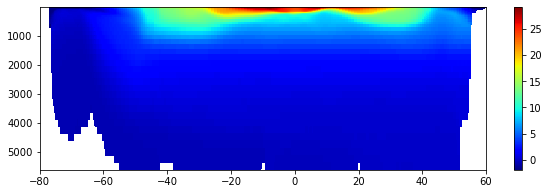

In [82]:
fig1, ax1 = plt.subplots(figsize=[10,3])
im1 = ax1.pcolormesh(THETAO['y'],THETAO['lev'],THETAO.thetao, cmap='jet')
#im = ax.contourf(DIC['y'],DIC['lev'],DIC.dissic)
#im1.set_clim([-5, 30])
ax1.set_xlim([-80,60])
ax1.invert_yaxis()
plt.colorbar(im1)
#ax.contour(DIC['y'],DIC['lev'],DIC.dissic,colors='w')


#plt.imshow(im, cmap='RdBu');



In [58]:
def slice1(col, var, exp, sources,abc):
    cat = col.search(variable_id = var, experiment_id = exp)
    ddict = cat.search(source_id=sources).to_dataset_dict(
    zarr_kwargs={'consolidated': True, 'use_cftime':True},
    storage_options={'token': 'anon'},
    preprocess=combined_preprocessing,
    aggregate=False)
    d = ddict[abc].isel(time=0).sel(x=slice(180,200)).mean('x', keep_attrs=True)
    fig, ax = plt.subplots(figsize = [10, 3])
    im = ax.pcolormesh(d['y'], d['lev'], d[var])
    ax.set_xlim([-80, 60])
    ax.invert_yaxis()
    cbar = plt.colorbar(im, ax = ax)
    cbar.set_label(d[var].attrs['long_name']+'\n('+d[var].attrs['units']+')')
    ax.set_title(d.attrs['source_id'])
    

In [31]:
abc = 'CMIP.NCC.NorESM2-LM.piControl.r1i1p1f1.Oyr.dissic.gr.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p1f1/Omon/thetao/gn/v20190306/.nan.20190306'
slice1(col, 'thetao', 'piControl', source_ids, abc)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


MIROC-ES2L: No units found


KeyError: 'CMIP.NCC.NorESM2-LM.piControl.r1i1p1f1.Oyr.dissic.gr.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p1f1/Omon/thetao/gn/v20190306/.nan.20190306'